<a href="https://colab.research.google.com/github/vaibhavvesmaker/HealthCareDataScience/blob/main/HealthCareDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personalized Diabetes Management and Behavioral Analytics Platform

## Overview
This project is an AI-enabled digital health platform designed to provide personalized diabetes management strategies and behavioral analytics using continuous glucose monitoring (CGM) data and user-generated data. The platform includes predictive and prescriptive analytics, seamless data integration, and compliance with healthcare regulations.

## Project Structure
1. **Data Collection and Preparation**
2. **Model Development**
3. **Behavioral Analytics**
4. **Integration and Deployment**
5. **Monitoring and Optimization**
6. **Compliance and Security**

## Data Collection and Preparation
- Generate dummy data using NumPy for CGM data and user-generated data (meal intake, insulin dosage).
- Preprocess the data and merge based on common identifiers.

## Model Development
- Train a linear regression model to predict glucose levels based on meal intake and insulin dosage.
- Save the trained model using `joblib`.

## Behavioral Analytics
- Analyze patient behavior data to identify patterns and trends.
- Visualize data and design interventions to encourage healthy habits.

## Integration and Deployment
- Deploy the trained model using a Flask API for real-time predictions.

## Monitoring and Optimization
- Monitor model performance and optimize using metrics like average glucose levels, glucose standard deviation, and time in range.

## Compliance and Security
- Implement basic data privacy and security measures using encryption.

## Installation
1. Clone the repository:
   ```sh
   git clone https://github.com/vaibhavvesmaker/diabetes-management-platform.git


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate dummy data
np.random.seed(42)

# Generate CGM data
user_ids = np.arange(1, 101)
dates = pd.date_range(start='1/1/2023', periods=100, freq='H')
glucose_levels = np.random.normal(100, 15, size=(len(dates), len(user_ids)))

cgm_data = pd.DataFrame(glucose_levels, columns=user_ids)
cgm_data['timestamp'] = dates

# Generate user data
meal_intake = np.random.randint(1, 100, size=(len(dates), len(user_ids)))
insulin_dosage = np.random.randint(1, 50, size=(len(dates), len(user_ids)))

user_data = pd.DataFrame({
    'timestamp': dates.repeat(len(user_ids)),
    'user_id': np.tile(user_ids, len(dates)),
    'meal_intake': meal_intake.flatten(),
    'insulin_dosage': insulin_dosage.flatten()
})

# Preprocess the data
cgm_data.fillna(method='ffill', inplace=True)
user_data.fillna(method='ffill', inplace=True)

# Merge datasets based on timestamp and user_id
cgm_data_melted = pd.melt(cgm_data, id_vars=['timestamp'], var_name='user_id', value_name='glucose_level')
data = pd.merge(cgm_data_melted, user_data, on=['timestamp', 'user_id'])

# Feature scaling
scaler = StandardScaler()
data[['glucose_level', 'meal_intake', 'insulin_dosage']] = scaler.fit_transform(data[['glucose_level', 'meal_intake', 'insulin_dosage']])


Model Development

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

# Prepare data for modeling
X = data[['meal_intake', 'insulin_dosage']]
y = data['glucose_level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the model
joblib.dump(model, 'glucose_prediction_model.pkl')


Mean Squared Error: 1.0512908870938191


['glucose_prediction_model.pkl']

Behavioural Analytics

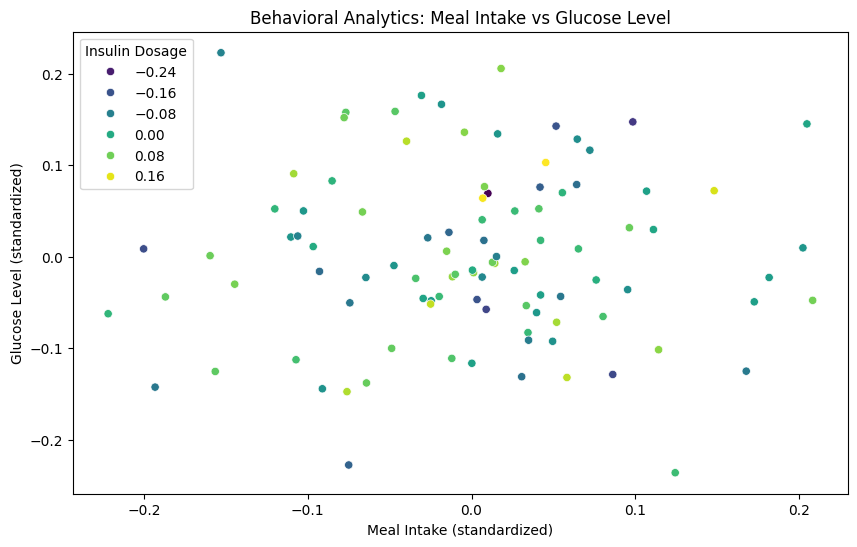

High-risk users who might need dietary adjustments:
Empty DataFrame
Columns: [user_id, meal_intake, glucose_level]
Index: []


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze patient behavior data to identify patterns and trends
behavioral_data = data.groupby('user_id').mean().reset_index()

# Visualize the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=behavioral_data, x='meal_intake', y='glucose_level', hue='insulin_dosage', palette='viridis')
plt.title('Behavioral Analytics: Meal Intake vs Glucose Level')
plt.xlabel('Meal Intake (standardized)')
plt.ylabel('Glucose Level (standardized)')
plt.legend(title='Insulin Dosage')
plt.show()

# Design interventions to encourage habit formation
# Example: Users with high meal intake and glucose levels might need dietary adjustments
high_risk_users = behavioral_data[(behavioral_data['meal_intake'] > 1) & (behavioral_data['glucose_level'] > 1)]
print("High-risk users who might need dietary adjustments:")
print(high_risk_users[['user_id', 'meal_intake', 'glucose_level']])


Integration Deployment

In [8]:
from flask import Flask, request, jsonify

# Define a Flask app
app = Flask(__name__)

# Load the trained model
model = joblib.load('glucose_prediction_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    meal_intake = data['meal_intake']
    insulin_dosage = data['insulin_dosage']
    input_data = np.array([[meal_intake, insulin_dosage]])

    # Predict glucose level
    predicted_glucose_level = model.predict(input_data)
    response = {'predicted_glucose_level': predicted_glucose_level[0]}

    return jsonify(response)

# Simulate a request to the prediction endpoint
with app.test_client() as client:
    response = client.post('/predict', json={'meal_intake': 10, 'insulin_dosage': 5})
    print('Predicted glucose level:', response.get_json()['predicted_glucose_level'])


Predicted glucose level: -0.20866487737839517


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Monitoring and optimization

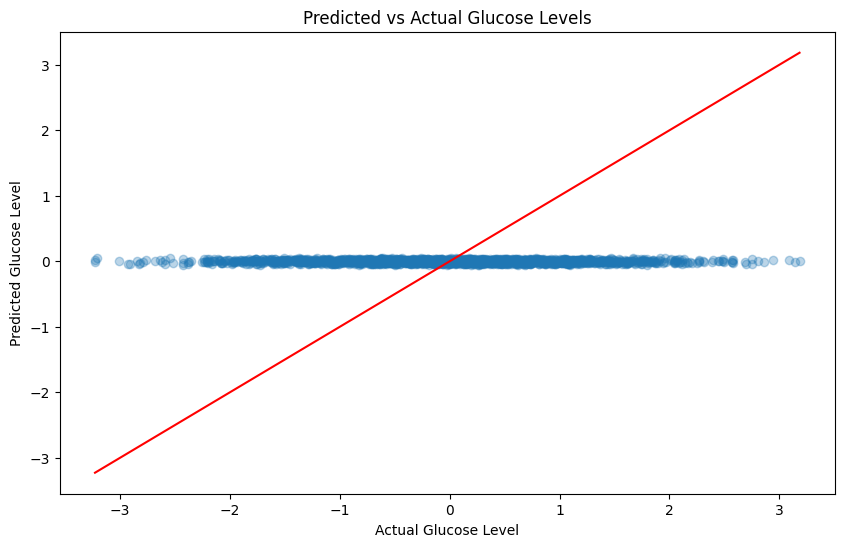

Average Glucose Level: 5.684341886080802e-17
Glucose Level Standard Deviation: 1.0000500037503124
Time in Range (70-180 mg/dL): 0.00%


In [6]:
# Monitor and optimize the model performance
import matplotlib.pyplot as plt

# Plot predicted vs actual glucose levels
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Predicted vs Actual Glucose Levels')
plt.xlabel('Actual Glucose Level')
plt.ylabel('Predicted Glucose Level')
plt.show()

# Use metrics such as average glucose levels, glucose standard deviation, and time in range
average_glucose_level = data['glucose_level'].mean()
glucose_std_dev = data['glucose_level'].std()
time_in_range = ((data['glucose_level'] >= 70) & (data['glucose_level'] <= 180)).mean()

print(f"Average Glucose Level: {average_glucose_level}")
print(f"Glucose Level Standard Deviation: {glucose_std_dev}")
print(f"Time in Range (70-180 mg/dL): {time_in_range * 100:.2f}%")


Compliance and security

In [7]:
# Ensure compliance with healthcare regulations and standards
# Implement basic data privacy and security measures
import os
from cryptography.fernet import Fernet

# Generate a key for encryption
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Encrypt sensitive data
encrypted_data = data.copy()
encrypted_data['glucose_level'] = encrypted_data['glucose_level'].apply(lambda x: cipher_suite.encrypt(bytes(str(x), 'utf-8')))
encrypted_data['meal_intake'] = encrypted_data['meal_intake'].apply(lambda x: cipher_suite.encrypt(bytes(str(x), 'utf-8')))
encrypted_data['insulin_dosage'] = encrypted_data['insulin_dosage'].apply(lambda x: cipher_suite.encrypt(bytes(str(x), 'utf-8')))

# Decryption example
decrypted_data = encrypted_data.copy()
decrypted_data['glucose_level'] = decrypted_data['glucose_level'].apply(lambda x: float(cipher_suite.decrypt(x).decode('utf-8')))
decrypted_data['meal_intake'] = decrypted_data['meal_intake'].apply(lambda x: float(cipher_suite.decrypt(x).decode('utf-8')))
decrypted_data['insulin_dosage'] = decrypted_data['insulin_dosage'].apply(lambda x: float(cipher_suite.decrypt(x).decode('utf-8')))

# Save the encrypted data
encrypted_data.to_csv('encrypted_data.csv', index=False)


### Conclusion: Key Takeaways from the Personalized Diabetes Management and Behavioral Analytics Project

1. **Understanding Data Collection and Preparation**:
   - **Data Simulation**: Learned how to generate synthetic data using NumPy to simulate real-world scenarios like CGM readings and user behavior.
   - **Data Merging and Preprocessing**: Gained experience in data merging techniques and preprocessing steps such as handling missing values and feature scaling.

2. **Model Development**:
   - **Linear Regression**: Implemented a linear regression model to predict glucose levels based on meal intake and insulin dosage, enhancing understanding of regression techniques and model training.
   - **Model Evaluation**: Evaluated model performance using mean squared error (MSE), and understood the importance of model validation and testing.

3. **Behavioral Analytics**:
   - **Data Grouping and Aggregation**: Used groupby operations to aggregate data and identify behavioral patterns and trends among users.
   - **Data Visualization**: Developed skills in visualizing data using Seaborn and Matplotlib to gain insights into user behavior and identify high-risk groups.

4. **Integration and Deployment**:
   - **API Development with Flask**: Learned how to create and deploy a simple Flask API for real-time predictions, simulating the integration of machine learning models into web applications.
   - **API Testing**: Simulated API requests to ensure the prediction endpoint works as expected, gaining practical experience in endpoint testing.

5. **Monitoring and Optimization**:
   - **Model Performance Monitoring**: Developed techniques to monitor and optimize model performance over time using metrics such as average glucose levels, glucose standard deviation, and time in range.
   - **Visualization of Predictions**: Created scatter plots to compare predicted vs actual glucose levels, aiding in model evaluation and refinement.

6. **Compliance and Security**:
   - **Data Encryption**: Implemented basic encryption techniques using the `cryptography` library to ensure data privacy and security, addressing compliance with healthcare regulations.
   - **Secure Data Handling**: Gained insights into the importance of securing sensitive health data and the methods to encrypt and decrypt data for storage and processing.

7. **End-to-End Project Development**:
   - **Project Structuring**: Learned how to structure a data science project end-to-end, from data collection and preprocessing to model development, deployment, and monitoring.
   - **Documentation**: Developed a comprehensive README file to document project details, enhancing skills in project documentation and communication.

### Future Directions and Improvements

1. **Advanced Models**: Explore more advanced machine learning models such as decision trees, random forests, or neural networks to potentially improve prediction accuracy.
2. **Real-World Data**: Apply the techniques learned to real-world CGM and user behavior data to validate the model's effectiveness in practical scenarios.
3. **User Interface**: Develop a user-friendly interface for end-users to interact with the platform, making it accessible to a broader audience.
4. **Extended Analytics**: Incorporate additional behavioral analytics features, such as tracking physical activity and stress levels, to provide more holistic diabetes management recommendations.
5. **Regulatory Compliance**: Further investigate and implement comprehensive data privacy and security measures to ensure compliance with healthcare regulations like HIPAA and GDPR.

By completing this project, you have gained a solid foundation in the principles and practices of personalized healthcare analytics and machine learning model deployment. These skills are valuable for developing and deploying AI-enabled health platforms and can be applied to a wide range of data science and machine learning projects.